## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo 6 - Redes neurais para dados sequenciais</span>

#### <span style="color:darkred">**Parte 3: Mecanismo de atenção**</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

In [ ]:
import numpy as np
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from numpy.random import seed
from tensorflow.random import set_seed


In [ ]:
def modelo_denso(input_shape):
    inputs = layers.Input(shape=(input_shape,))

    # Atenção baseada em softmax
    attention_probs = layers.Dense(input_shape, activation='softmax', name='attention_vec')(inputs)
    attention_mul = layers.Multiply(name='attention_mul')([inputs, attention_probs])
    # Fim da camada de atencao

    attention_mul = layers.Dense(16)(attention_mul)
    output = layers.Dense(1, activation='sigmoid')(attention_mul)
    model = keras.models.Model(inputs=[inputs], outputs=output)
    return model

In [ ]:
def dados_atencao(N, dim, atencao=(1, 3)):  
    x = (np.random.randn(N*dim)*0.25).reshape([N,dim])
    y = np.random.randint(low=0, high=2, size=(N, 1))
    for at in atencao:
      x[:, at] = y[:, 0]
    return x, y

Model: "functional_137"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
attention_vec (Dense)           (None, 10)           110         input_24[0][0]                   
__________________________________________________________________________________________________
attention_mul (Multiply)        (None, 10)           0           input_24[0][0]                   
                                                                 attention_vec[0][0]              
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 16)           176         attention_mul[0][0] 

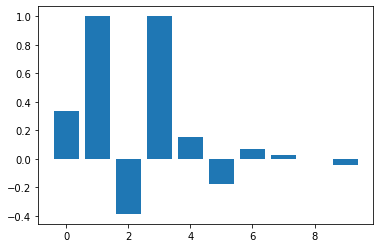

In [ ]:
N = 100
d = 10

seed(10)
train_x, train_y = dados_atencao(N, d)
test_x, test_y = dados_atencao(1, d)

plt.bar(np.arange(d), train_x[0])

modelD = modelo_denso(d)
modelD.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(modelD.summary())

output_att = keras.models.Model(inputs=modelD.input, outputs=modelD.get_layer('attention_vec').output)
output_mul = keras.models.Model(inputs=modelD.input, outputs=modelD.get_layer('attention_mul').output)

Vetor de "atencao" = [0.11698934 0.05655674 0.08982814 0.17935708 0.0711864  0.13629211
 0.14916906 0.04919047 0.0760324  0.0753983 ]


<BarContainer object of 10 artists>

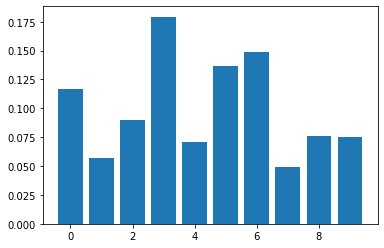

In [ ]:
attention_vector = output_att.predict(test_x)[0]
print('Vetor de "atencao" =', attention_vector)
plt.bar(np.arange(d), attention_vector)

Vetor de "atencao" ponderado = [-0.06823912  0.05655674 -0.03263252  0.17935708 -0.02487232  0.0029266
  0.09885023 -0.00596336  0.02604298  0.00857092]


<BarContainer object of 10 artists>

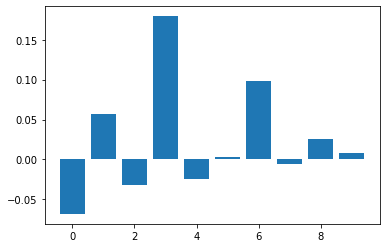

In [ ]:
attention_mul = output_mul.predict(test_x)[0]
print('Vetor de "atencao" ponderado =', attention_mul)
plt.bar(np.arange(d), attention_mul)

In [ ]:
modelD.fit(train_x, train_y, epochs=50, batch_size=16, verbose=0)
score1 = modelD.evaluate(train_x, train_y,  verbose=0)
print("Acurácia treinamento:", score1[1]*100)

Acurácia treinamento: 100.0


[[-0.58329351  1.         -0.36327728  1.         -0.34939707  0.02147302
   0.66267247 -0.12122994  0.34252481  0.11367529]]


Text(0.5, 1.0, 'Vetor atencao ponderado')

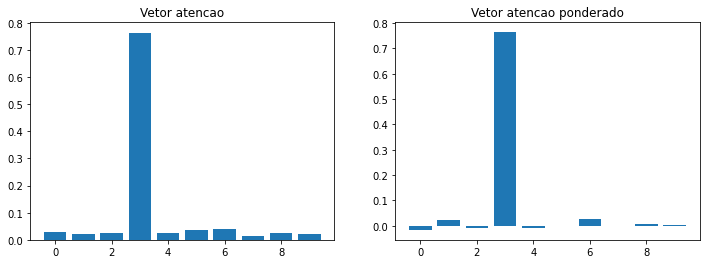

In [ ]:
print(test_x)
attention_vector = output_att.predict(test_x)[0]
#print('Vetor de "atencao" =', attention_vector)
plt.figure(figsize=(12,4))
plt.subplot(121); plt.bar(np.arange(d), attention_vector); plt.title("Vetor atencao")
attention_mul = output_mul.predict(test_x)[0]
#print('Vetor de "atencao" ponderado =', attention_mul)
plt.subplot(122); plt.bar(np.arange(d), attention_mul); plt.title("Vetor atencao ponderado")